
## reference:
https://www.kaggle.com/omarelgabry/a-journey-through-titanic/notebook

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')
import os
d='./input'
import pandas as pd
%matplotlib inline


In [8]:
d_train=pd.read_csv(os.path.join(d,'train.csv'))
d_test=pd.read_csv(os.path.join(d,'test.csv'))
d_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
d_train.info()
print("---------------------------------")
d_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
---------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object

In [18]:
d_train.drop(["PassengerId","Ticket"],axis=1,inplace=True)
d_test.drop(["Ticket"],axis=1,inplace=True)

In [27]:
d_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S


In [31]:
d_train["Embarked"]=d_train["Embarked"].fillna("S")

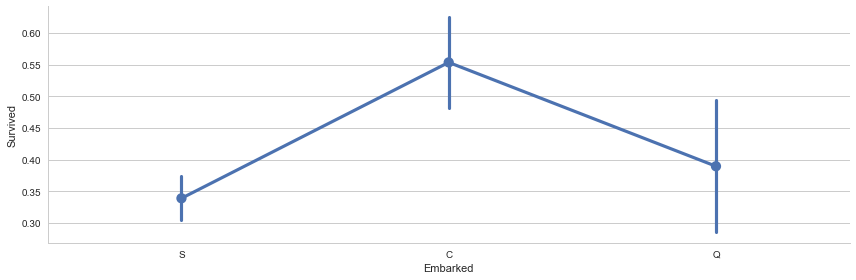

In [36]:
sns.factorplot(x="Embarked",y="Survived",data=d_train,size=4,aspect=3,kind="point")

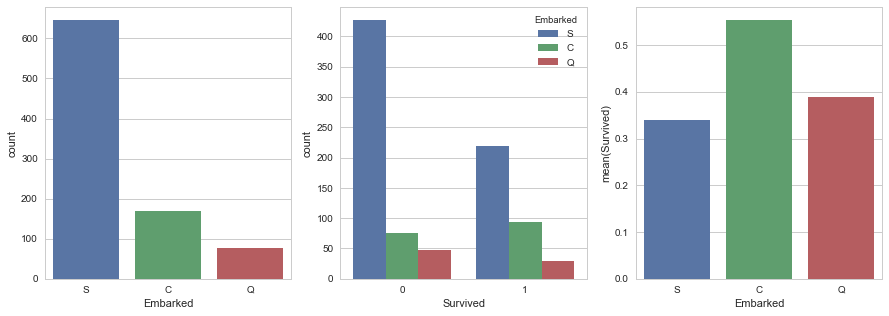

In [53]:
fig,(ax0,ax1,ax2)=plt.subplots(1,3,figsize=(15,5))
sns.countplot(x="Embarked",data=d_train,ax=ax0)
sns.countplot(x="Survived",hue='Embarked',data=d_train,ax=ax1)
embark_survived=d_train[["Embarked","Survived"]].groupby("Embarked").mean().reset_index()
sns.barplot(x="Embarked",y="Survived",data=embark_survived,ax=ax2,order=['S','C','Q'])

In [57]:
embark_dummies_train=pd.get_dummies(d_train["Embarked"])
embark_dummies_test  = pd.get_dummies(d_test['Embarked'])
embark_dummies_train

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [60]:
d_train_join=d_train.join(embark_dummies_train)
d_test_join=d_test.join(embark_dummies_test)
d_train_join.drop("Embarked",axis=1,inplace=True)
d_test_join.drop("Embarked",axis=1,inplace=True)
d_test_join.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,C,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,0,0,1


In [61]:
#Fare
d_test_join["Fare"].fillna(d_test_join.Fare.median(),inplace=True)

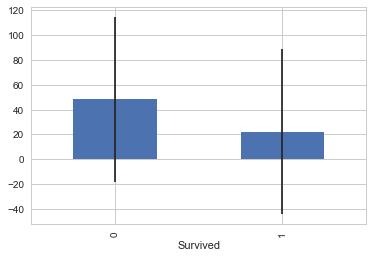

In [71]:
fare_survived=d_train_join[d_train_join.Survived==1]["Fare"]
fare_not_survived=d_train_join[d_train_join.Survived==0]["Fare"]
fare_mean=pd.DataFrame([fare_survived.mean(),fare_not_survived.mean()])
fare_std=pd.DataFrame([fare_survived.std(),fare_survived.std()])
fare_mean.index.names=fare_std.index.names=["Survived"]
fare_mean.plot(yerr=fare_std,kind='bar',legend=False)

In [77]:
d_train_join

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,C,Q,S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,1,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,0,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,0,0,1
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,0,1,0
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,0,0,1
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,0,0,1
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,NaN,0,0,1
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,NaN,1,0,0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


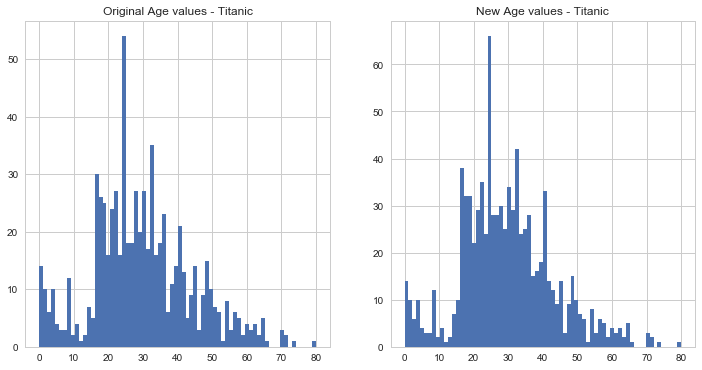

In [93]:
#age
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
ax1.set_title("Original Age values - Titanic")
ax2.set_title("New Age values - Titanic")

# get average, std, and number of NaN values in titanic_df
average_age_titanic   = d_train_join["Age"].mean()
std_age_titanic       = d_train_join["Age"].std()
count_nan_age_titanic = d_train_join["Age"].isnull().sum()

# get average, std, and number of NaN values in test_df
average_age_test   = d_test_join["Age"].mean()
std_age_test       = d_test_join["Age"].std()
count_nan_age_test = d_test_join["Age"].isnull().sum()

rand_train=np.random.randint(average_age_titanic-std_age_titanic,average_age_titanic+std_age_titanic,size=count_nan_age_titanic)
rand_test=np.random.randint(average_age_test-std_age_test,average_age_test+std_age_test,size=count_nan_age_test)

d_train_join.Age.dropna().astype(int).hist(ax=ax1,bins=70)

d_train_join["Age"][d_train_join.Age.isnull()]=rand_train
d_test_join["Age"][d_test_join.Age.isnull()]=rand_test

d_train_join.Age.dropna().astype(int).hist(ax=ax2,bins=70)

In [94]:
d_train_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
C           891 non-null uint8
Q           891 non-null uint8
S           891 non-null uint8
dtypes: float64(2), int64(4), object(3), uint8(3)
memory usage: 65.3+ KB


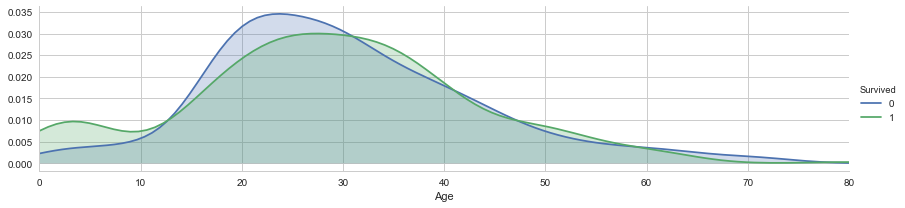

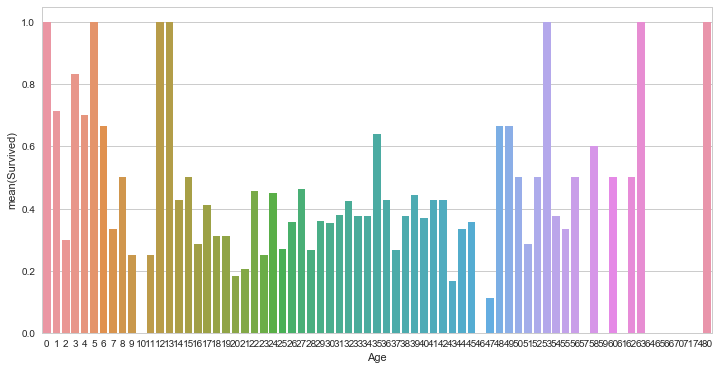

In [112]:
facet=sns.FacetGrid(data=d_train_join,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,d_train_join.Age.max()))
facet.add_legend()

fig,ax=plt.subplots(figsize=(12,6))
d_survived_groupbyAge=d_train_join[["Age","Survived"]].astype(int).groupby("Age",as_index=False).mean()
sns.barplot(x="Age",y="Survived",data=d_survived_groupbyAge)

In [120]:
d_train_join.drop("Cabin",axis=1,inplace=True)
d_test_join.drop("Cabin",axis=1,inplace=True)
d_train_join.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,1,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,0,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0,0,1


In [125]:
#Family
d_train_join["Family"]=d_train_join["SibSp"]+d_train_join["Parch"]
d_train_join["Family"].loc[d_train_join.Family>0]=1
d_train_join["Family"].loc[d_train_join.Family==0]=0
d_train_join.drop(["SibSp","Parch"],axis=1,inplace=True)
d_test_join["Family"]=d_test_join["SibSp"]=d_test_join["Parch"]
d_test_join["Family"].loc[d_test_join.Family>0]=1
d_test_join["Family"].loc[d_test_join.Family==0]=0
d_test_join.drop(["SibSp","Parch"],axis=1,inplace=True)
d_train_join.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Survived,Pclass,Name,Sex,Age,Fare,C,Q,S,Family
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,0,0,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,1,0,0,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,0,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,0,0,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,0,0,1,0


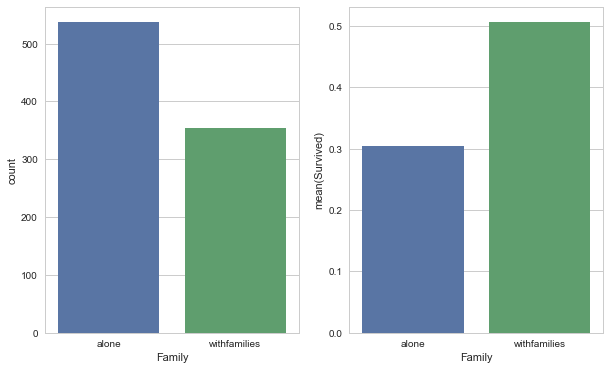

In [134]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,6))
sns.countplot(x="Family",data=d_train_join,ax=ax1,order=(0,1))
ax1.set_xticklabels(["alone","withfamilies"])

family_sur_mean=d_train_join[["Family","Survived"]].groupby("Family",as_index=False).mean()
sns.barplot(x="Family",y="Survived",data=family_sur_mean,order=(0,1),ax=ax2)

ax2.set_xticklabels(["alone","withfamilies"])

In [139]:
d_test_join.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,C,Q,S,Family
0,892,3,"Kelly, Mr. James",male,34.5,7.8292,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,7.0000,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,9.6875,0,1,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,8.6625,0,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,12.2875,0,0,1,1


In [142]:
def get_gender(person):
    sex,age=person
    return "child" if age<16 else "male" if sex=="male" else "female"

d_train_join["Person"]=d_train_join[["Sex","Age"]].apply(get_gender,axis=1)
d_test_join["Person"]=d_test_join[["Sex","Age"]].apply(get_gender,axis=1)

d_train_join.drop("Sex",axis=1,inplace=True)
d_test_join.drop("Sex",axis=1,inplace=True)

In [143]:
d_train_join.head()

,Survived,Pclass,Name,Age,Fare,C,Q,S,Family,Person
0,0,3,"Braund, Mr. Owen Harris",22.0,7.2500,0,0,1,1,male
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,71.2833,1,0,0,1,female
2,1,3,"Heikkinen, Miss. Laina",26.0,7.9250,0,0,1,0,female
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,53.1000,0,0,1,1,female
4,0,3,"Allen, Mr. William Henry",35.0,8.0500,0,0,1,0,male


In [148]:
train_person_dummy=pd.get_dummies(d_train_join["Person"])
train_person_dummy.columns=["Child","Female","Male"]

train_person_dummy.drop(['Male'], axis=1, inplace=True)

test_person_dummy=pd.get_dummies(d_test_join["Person"])
test_person_dummy.columns=["Child","Female","Male"]
test_person_dummy.drop(["Male"],axis=1,inplace=True)
train_join_person=d_train_join.join(train_person_dummy)
test_join_person=d_test_join.join(test_person_dummy)

In [151]:
test_join_person.drop(["Person"],axis=1,inplace=True)
train_join_person.drop(["Person"],axis=1,inplace=True)

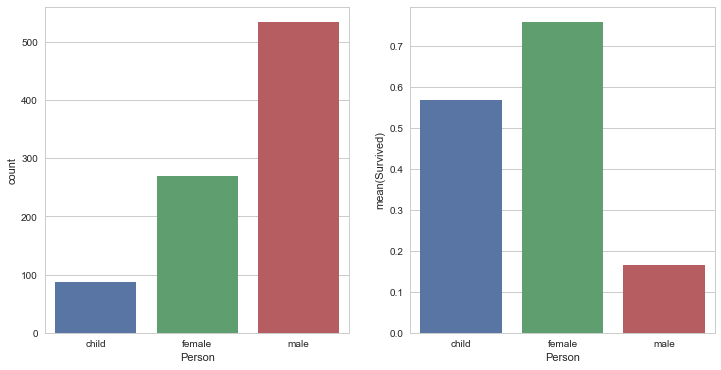

In [162]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
sns.countplot(x="Person",data=d_train_join,ax=ax1,order=["child","female","male"])
person_perc = d_train_join[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x="Person",y="Survived",data=person_perc,order=["child","female","male"],ax=ax2)

## Titanic Data Science Solutions
reference:https://www.kaggle.com/startupsci/titanic-data-science-solutions

In [163]:
combine=[d_train,d_test]

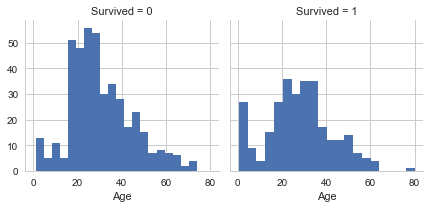

In [174]:
g=sns.FacetGrid(d_train,col="Survived")
g.map(plt.hist,"Age",bins=20)
g.add_legend()

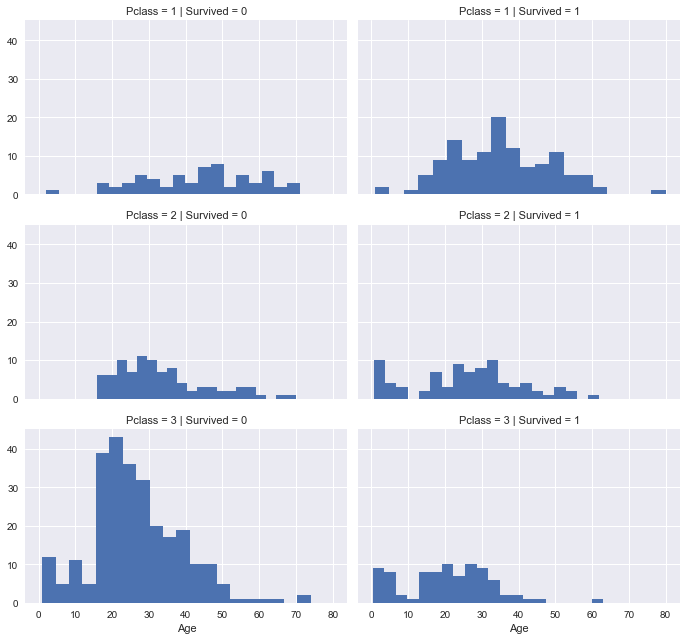

In [182]:
sns.set_style("darkgrid")
grid=sns.FacetGrid(d_train,row="Pclass",col="Survived",size=3,aspect=1.6)
grid.map(plt.hist,"Age",bins=20)
grid.add_legend()

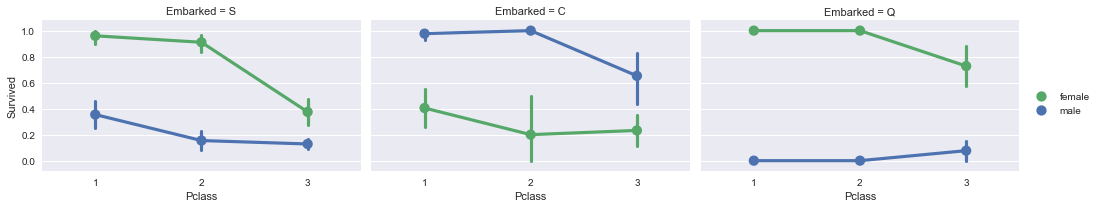

In [192]:
g1=sns.FacetGrid(d_train,col="Embarked",size=3,aspect=1.6)
g1.map(sns.pointplot,"Pclass","Survived","Sex",palette="deep")
g1.add_legend()

In [194]:
d_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


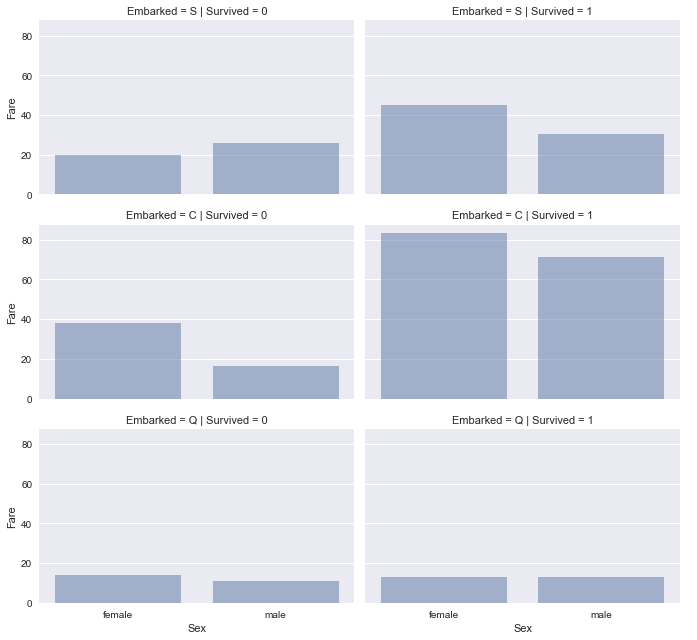

In [198]:
grid=sns.FacetGrid(d_train,row="Embarked",col="Survived",size=3,aspect=1.6)
grid.map(sns.barplot,"Sex","Fare", alpha=.5, ci=None)
grid.add_legend()

In [199]:
d_train_c1=d_train.drop(["Cabin"],axis=1)
d_test_c1=d_test.drop("Cabin",axis=1)
combine=[d_train_c1,d_test_c1]

In [200]:
d_train_c1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [201]:
for ds in combine:
    ds["Title"]=ds.Name.str.extract(" ([A-Za-z]+)\.",expand=False)
pd.crosstab(d_train_c1["Title"],d_train_c1["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [205]:
for ds in combine:
    ds["Title"]=ds["Title"].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    ds['Title'] = ds['Title'].replace('Mlle', 'Miss')
    ds['Title'] = ds['Title'].replace('Ms', 'Miss')
    ds['Title'] = ds['Title'].replace('Mme', 'Mrs')
d_train_c1[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [206]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for ds in combine:
    ds["Title"]=ds["Title"].map(title_mapping)
    ds["Title"]=ds["Title"].fillna(0)

d_train_c1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [208]:
d_train_c1.drop(["Name"],axis=1,inplace=True)
d_test_c1.drop(["Name"],axis=1,inplace=True)

In [209]:
d_train_c1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


In [210]:
sex_mapping={"male":1,"female":0}
for ds in combine:
    ds["Sex"]=ds["Sex"].map(sex_mapping).astype(int)

d_train_c1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,S,1
1,1,1,0,38.0,1,0,71.2833,C,3
2,1,3,0,26.0,0,0,7.9250,S,2
3,1,1,0,35.0,1,0,53.1000,S,3
4,0,3,1,35.0,0,0,8.0500,S,1
